Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


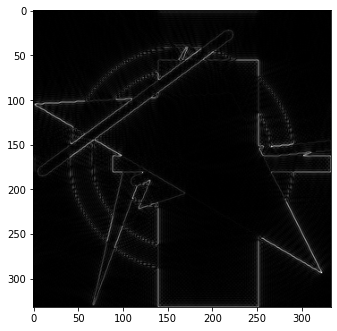

In [1]:
import cv2,copy
import numpy as np
from google.colab import drive
import os
from math import sqrt
import cmath
from matplotlib import pyplot as plt
drive.mount("/content/drive")
img = cv2.imread('./drive/My Drive/VPython/img_python_labs/lab_1/img_task_1.png')
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dft_ = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft_)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0
fshift = dft_shift * mask
fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

fig = plt.figure(figsize=(12, 12))
ax4 = fig.add_subplot(2,2,1)
ax4.imshow(img_back, cmap='gray')
plt.savefig('./drive/My Drive/VPython/img_python_labs/lab_6/img_task_1.png', bbox_inches="tight")
plt.show()





In [2]:
import cv2,copy
import numpy as np
from google.colab import drive
import os
from math import sqrt
import cmath
from matplotlib import pyplot as plt
drive.mount("/content/drive")
img = cv2.imread('./drive/My Drive/VPython/img_python_labs/lab_1/img_task_1.png')
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

r = 30 
ham = np.hamming(img.shape[0])[:,None] 
ham1 = np.hamming(img.shape[1])[:,None] 
ham2d = np.sqrt(np.dot(ham, ham1.T)) ** r 
f = cv2.dft(img.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shifted = np.fft.fftshift(f)
f_complex = f_shifted[:,:,0]*1j + f_shifted[:,:,1]
f_filtered = f_complex*ham2d
f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted)
filtered_img = np.abs(inv_img)
filtered_img = filtered_img.astype(np.uint8)
cv2.imwrite('./drive/My Drive/VPython/img_python_labs/lab_6/img_task_2.png',np.real(filtered_img))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


True

In [3]:
import cv2,copy
import numpy as np
from google.colab import drive
import os
from math import sqrt
import cmath
from matplotlib import pyplot as plt
drive.mount("/content/drive")
img = cv2.imread('./drive/My Drive/VPython/img_python_labs/lab_1/img_task_1.png')
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
F1 = np.fft.fft2((img).astype(float))
F2 = np.fft.fftshift(F1)
(w, h) = img.shape
half_w, half_h = int(w/2), int(h/2)
n = 10
F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 
img1 = np.fft.ifft2(np.fft.ifftshift(F2)).real

cv2.imwrite('./drive/My Drive/VPython/img_python_labs/lab_6/img_task_3.png',img1)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


True